# **Retail Transaction Data Analysis and Predicting Models**


The company is hiring you as their new Data Science Consultant. In your first week, you are given a dataset. You are expected to analyze this dataset and draw insights on how the company can improve its sales. By the end of the first week, you are expected to present your analysis, insights, and recommendations to the company’s CEO and Sales Director in a 30-minute meeting time.


---


# **TASK-1** - Business Analysis
---
Could you derive and share some insights based on the dataset for the CEO and Sales Director, feel free to pick some metrics/findings that you think worth to share to the management.

# **Company Overview**

Founded in 2009, Charm&Cheer (CnC) is a multinational retail company renowned for its wide array of high-quality gift items. Over the years, CnC has expanded its footprint across more than 40 countries, becoming a household name in the global retail market. Our product offerings unique gift-ware to include home decor, unique items, and seasonal merchandise, making us a one-stop shop for customers seeking delightful and charming products.


**Business Problem**


The CEO and Sales Director of Charm&Cheer (CnC) **seek to gain insights from the transaction data** spanning the last two years (December 2009 - December 2011). The findings from this analysis will be instrumental in enhancing the company's sales performance in the future.


The findings will be reviewed across several key areas:
- `Sales Performance`
- `Sales Trendline`
- `Product Performance`
- `Market Analysis`


# **Dataset General Information**

In [175]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

- loading dataset to our workspace

In [110]:
df = pd.read_csv('retail_transaction_data.csv')
df.head()


,order_id,product_id,product_description,quantity,order_date,unit_price,customer_id,country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


- check the data composition (rows and columns)

In [111]:
x,z = df.shape
print(f'{x} rows , {z} columns')

1067371 rows , 8 columns


- **Rows Explanation**

This dataset comprises `1067371 rows`, each representing `transaction data for each time`. It includes information such as Order ID, Product ID, Product Description, Quantity, Order Date, Unit Price, Customer ID, and Country.

- **Columns Explanation**

|Column name| Description|
|--|--|
| `Order ID`| Order Identifier, unique for each Transaction. ID starts with 'C' is a cancelled Order|
| `Product ID`| Product Identifier, unique for each product|
| `Product Description`| Product Description for given product ID|
| `Quantity`| Quantities Sold for each Order, will be negative if it's a cancelled order|
| `Order Date`| The datetime when a transaction occured|
| `Unit Price`| Price per Unit in GBP (UK Pounds Sterling)|
| `CustomerID`| Customer Identifier, unique for each customer|
| `Country`| Country name where the transaction happened|

- We will check the unique values count and sample unique values for each column.

In [112]:
df.columns

Index(['order_id', 'product_id', 'product_description', 'quantity',
       'order_date', 'unit_price', 'customer_id', 'country'],
      dtype='object')

In [113]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)


def unique_data(df):
   
    data_unique = pd.DataFrame()
    data_unique['Columns'] = ['order_id', 'product_id', 'product_description', 'quantity',
       'order_date', 'unit_price', 'customer_id', 'country']
    data_unique['Unique Count'] = [df[col].nunique() for col in (['order_id', 'product_id', 'product_description', 'quantity',
       'order_date', 'unit_price', 'customer_id', 'country'])]
    data_unique['Unique'] = [df[col].unique() for col in (['order_id', 'product_id', 'product_description', 'quantity',
       'order_date', 'unit_price', 'customer_id', 'country'])]
   
    return data_unique
unique_data(df)


,Columns,Unique Count,Unique
0,order_id,53628,"[489434, 489435, 489436, 489437, 489438, 489439, 489440, 489441, 489442, 489443, 489444, 489445, 489446, 489447, 489448, C489449, 489450, C489459, 489460, 489461, 489462, 489464, 489465, 489463, 489467, C489476, 489488, C489503, C489504, 489505, 489514, 489517, C489518, 489519, 489520, 489521, 489522, 489523, C489524, 489525, 489526, C489527, C489528, 489529, C489530, 489531, 489532, 489533, C489534, C489535, 489536, 489537, C489538, 489540, C489541, 489539, 489542, C489543, 489544, 489545, 489546, 489547, 489548, C489549, 489550, C489551, 489552, C489553, C489554, C489555, 489556, 489557, 489558, 489559, 489560, 489561, 489562, C489563, 489564, C489565, 489566, 489567, 489569, C489568, C489570, 489571, 489572, 489573, 489574, 489575, C489577, 489576, C489578, 489579, 489580, C489583, 489582, 489581, 489584, 489585, ...]"
1,product_id,5305,"[85048, 79323P, 79323W, 22041, 21232, 22064, 21871, 21523, 22350, 22349, 22195, 22353, 48173C, 21755, 21754, 84879, 22119, 22142, 22296, 22295, 22109, 22107, 22194, 35004B, 82582, 21181, 21756, 21333, 84596F, 84596L, 22111, 22143, 22145, 22130, 21364, 21360, 21351, 21352, 35400, 20695, 37370, 10002, 84507B, 20703, 21987, 21989, 84970S, 20971, 22271, 22272, 22274, 21912, 22112, 21329, 21252, 21100, 21033, 20711, 21410, 21411, 84031A, 84031B, 84032A, 84032B, 84519A, 84519B, 85132A, 85132C, 85183A, 85183B, 22065, 22138, 22139, 22352, 85014A, 85014B, 16161P, 16169N, 21491, 22333, 85216, 21493, 21731, 85232B, 84691, 20749, POST, 22321, 84029E, 21955, 84899E, 85123A, 21582, 21586, 21590, 22091, 84251J, 22024, 22026, 22029, ...]"
2,product_description,5698,"[15CM CHRISTMAS GLASS BALL 20 LIGHTS, PINK CHERRY LIGHTS, WHITE CHERRY LIGHTS, RECORD FRAME 7"" SINGLE SIZE , STRAWBERRY CERAMIC TRINKET BOX, PINK DOUGHNUT TRINKET POT , SAVE THE PLANET MUG, FANCY FONT HOME SWEET HOME DOORMAT, CAT BOWL , DOG BOWL , CHASING BALL DESIGN, HEART MEASURING SPOONS LARGE, LUNCHBOX WITH CUTLERY FAIRY CAKES , DOOR MAT BLACK FLOCK , LOVE BUILDING BLOCK WORD, HOME BUILDING BLOCK WORD, ASSORTED COLOUR BIRD ORNAMENT, PEACE WOODEN BLOCK LETTERS, CHRISTMAS CRAFT WHITE FAIRY , HEART IVORY TRELLIS LARGE, HEART FILIGREE DOVE LARGE, FULL ENGLISH BREAKFAST PLATE, PIZZA PLATE IN BOX, BLACK DINER WALL CLOCK, SET OF 3 BLACK FLYING DUCKS, AREA PATROLLED METAL SIGN, PLEASE ONE PERSON METAL SIGN, BATH BUILDING BLOCK WORD, CLASSIC WHITE FRAME, SMALL MARSHMALLOWS PINK BOWL, BISCUITS SMALL BOWL LIGHT BLUE, SCOTTIE DOG HOT WATER BOTTLE, CHRISTMAS CRAFT HEART DECORATIONS, CHRISTMAS CRAFT HEART STOCKING , PARTY CONE CHRISTMAS DECORATION , PEACE SMALL WOOD LETTERS, JOY LARGE WOOD LETTERS, CINAMMON & ORANGE WREATH, EUCALYPTUS & PINECONE WREATH, WOODEN BOX ADVENT CALENDAR , FLORAL BLUE MONSTER, RETRO COFFEE MUGS ASSORTED, INFLATABLE POLITICAL GLOBE , STRIPES DESIGN MONKEY DOLL, BLUE PADDED SOFT MOBILE, PACK OF 6 SKULL PAPER CUPS, PACK OF 20 SKULL PAPER NAPKINS, HANGING HEART ZINC T-LIGHT HOLDER, PINK BLUE FELT CRAFT TRINKET BOX, FELTCRAFT DOLL ROSIE, FELTCRAFT DOLL MARIA, FELTCRAFT DOLL EMILY, VINTAGE SNAKES & LADDERS, CHOCOLATE HOT WATER BOTTLE, DINOSAURS WRITING SET , SET OF MEADOW FLOWER STICKERS, CHARLIE AND LOLA CHARLOTTE BAG, JUMBO BAG CHARLIE AND LOLA TOYS, JUMBO BAG TOYS , COUNTRY COTTAGE DOORSTOP GREEN, GINGHAM HEART DOORSTOP RED, CHARLIE+LOLA RED HOT WATER BOTTLE , CHARLIE LOLA BLUE HOT WATER BOTTLE , CHARLIE+LOLA PINK HOT WATER BOTTLE, CHARLIE + LOLA RED HOT WATER BOTTLE, TOMATO CHARLIE+LOLA COASTER SET, CARROT CHARLIE+LOLA COASTER SET, CHARLIE + LOLA BISCUITS TINS, CHARLIE AND LOLA FIGURES TINS, CHARLIE & LOLA WASTEPAPER BIN BLUE, CHARLIE & LOLA WASTEPAPER BIN FLORA, CHRISTMAS PUDDING TRINKET POT , BAKING SET 9 PIECE RETROSPOT , RETRO SPOT TEA SET CERAMIC 11 PC , LUNCHBOX WITH CUTLERY RETROSPOT , BLACK/BLUE DOTS RUFFLED UMBRELLA, RED/WHITE DOTS RUFFLED UMBRELLA, WRAP ENGLISH ROSE , WRAP BLUE RUSSIAN FOLKART, SET OF THREE VINTAGE GIFT WRAPS, RETRO SPORT PARTY BAG + STICKER SET, ASSORTED C

# **Data Manipulation and Cleaning**

### **Data Manipulation**

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   order_id             1067371 non-null  object 
 1   product_id           1067371 non-null  object 
 2   product_description  1062989 non-null  object 
 3   quantity             1067371 non-null  int64  
 4   order_date           1067371 non-null  object 
 5   unit_price           1067371 non-null  float64
 6   customer_id          824364 non-null   float64
 7   country              1067371 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 65.1+ MB


- After checking, we will change the data type of the `order_date` column to an object and then split it into four separate columns: `year`, `month`, `day`, and `hour`.

In [115]:
df['order_date'] = df['order_date'].astype(str)

df['order_date'] = pd.to_datetime(df['order_date'], format='%Y-%m-%d %H:%M:%S')

df['year'] = df['order_date'].dt.year
df['month'] = df['order_date'].dt.month
df['day'] = df['order_date'].dt.day
df['hour'] = df['order_date'].dt.hour
df.head()

,order_id,product_id,product_description,quantity,order_date,unit_price,customer_id,country,year,month,day,hour
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,2009,12,1,7
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009,12,1,7
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009,12,1,7
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,2009,12,1,7
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,2009,12,1,7


- After that, we can add a `sales` column, which will be the result of `multiplying the quantity column by the unit_price column`.

In [116]:
df['sales'] = df['quantity'] * df['unit_price']
df.head()

,order_id,product_id,product_description,quantity,order_date,unit_price,customer_id,country,year,month,day,hour,sales
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,2009,12,1,7,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009,12,1,7,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009,12,1,7,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,2009,12,1,7,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,2009,12,1,7,30.0


### **Data Cleaning**

#### **Duplicate Check and Handling**

In [117]:
duplicates = df[df.duplicated()]
len(duplicates)

34335

- There are `34335` duplicated rows, which is 3% of the data. We can drop bcs, there is `no significant impact for analysis`.

In [118]:
df = df.drop_duplicates(keep='first')
len(df)

1033036

- After dropping, the current number of rows is `1033036`

#### **Missing Value Check and Handling**

In [119]:
missing_values = pd.DataFrame(df.isnull().sum(), columns=['Total Null Values'])
missing_values['Percentage'] = (missing_values['Total Null Values'] / df.shape[0]) * 100
missing_values


,Total Null Values,Percentage
order_id,0,0.000000
product_id,0,0.000000
product_description,4275,0.413829
quantity,0,0.000000
order_date,0,0.000000
unit_price,0,0.000000
customer_id,235151,22.763098
country,0,0.000000
year,0,0.000000
month,0,0.000000


- There are 2 columns with missing values : 
1. `product_description`
2. `customer_id`

1. Product Description

- This column has 4275 missing value, which is 0.4% of total data. Since this column provides descriptions for `product_id`, we will attempt to fill the missing values in the `product_description` column using the information from the `product_id` column. 

In [120]:
description_mapping = df.dropna(subset=['product_description']).drop_duplicates(subset=['product_id']).set_index('product_id')['product_description'].to_dict()


df['product_description'] = df['product_description'].fillna(df['product_id'].map(description_mapping))

In [121]:
df['product_description'].isnull().sum()

363

- After filling the missing value using the available `product_id` information, the number of missing values in `product_description` has reduced to 363. We can drop these rows.

In [122]:
df.dropna(subset=['product_description'], inplace=True)

In [123]:
display(df['product_description'].isnull().sum())
len(df)

0

1032673

- After dropping the rows, missing values in `product_description` are 0 now, and number of rows from all data has been reduced to `1032673` now 

2. Customer ID

- This column has `235151` missing value, which is 22.7% of total data. We will fill the empty values in this columns with 'Unidentified', because it's too large to drop.

In [124]:
df['customer_id'].isnull().sum()

234788

In [125]:
df['customer_id'].fillna('Unidentified', inplace=True)

In [126]:

df['customer_id'].isnull().sum()

0

- The missing values in `customer_id` are 0 now, as we have been replaced with `Unidentified`

- The data from both columns is clean now, so if we check again : 

In [127]:
missing_values = pd.DataFrame(df.isnull().sum(), columns=['Total Null Values'])
missing_values['Percentage'] = (missing_values['Total Null Values'] / df.shape[0]) * 100
missing_values

,Total Null Values,Percentage
order_id,0,0.0
product_id,0,0.0
product_description,0,0.0
quantity,0,0.0
order_date,0,0.0
unit_price,0,0.0
customer_id,0,0.0
country,0,0.0
year,0,0.0
month,0,0.0


- The data frame is now `free of missing value`

#### **Drop non-products rows**

In [128]:
non_product = df[df['product_id'].str[0].str.isalpha()]
display(non_product.head())
display(len(non_product))

,order_id,product_id,product_description,quantity,order_date,unit_price,customer_id,country,year,month,day,hour,sales
89,489439,POST,POSTAGE,3,2009-12-01 09:28:00,18.0,12682.0,France,2009,12,1,9,54.0
126,489444,POST,POSTAGE,1,2009-12-01 09:55:00,141.0,12636.0,USA,2009,12,1,9,141.0
173,489447,POST,POSTAGE,1,2009-12-01 10:10:00,130.0,12362.0,Belgium,2009,12,1,10,130.0
625,489526,POST,POSTAGE,6,2009-12-01 11:50:00,18.0,12533.0,Germany,2009,12,1,11,108.0
735,C489535,D,Discount,-1,2009-12-01 12:11:00,9.0,15299.0,United Kingdom,2009,12,1,12,-9.0


5958

- There are `5958` rows of transactions that are not actual transactions but instead represent shipping and handling cost. we need to remove these rows as it can affect to our analysis

In [129]:
non_product['product_id'].unique()

array(['POST', 'D', 'DCGS0058', 'DCGS0068', 'DOT', 'M', 'DCGS0004',
       'DCGS0076', 'C2', 'BANK CHARGES', 'DCGS0003', 'TEST001',
       'gift_0001_80', 'DCGS0072', 'gift_0001_20', 'DCGS0044', 'TEST002',
       'gift_0001_10', 'gift_0001_50', 'DCGS0066N', 'gift_0001_30',
       'PADS', 'ADJUST', 'gift_0001_40', 'gift_0001_70', 'DCGSSGIRL', 'm',
       'DCGS0062', 'DCGS0037', 'DCGSSBOY', 'S', 'DCGS0069', 'DCGS0070',
       'DCGS0075', 'B', 'DCGS0041', 'ADJUST2', 'SP1002', 'AMAZONFEE',
       'DCGS0073', 'DCGS0067', 'CRUK'], dtype=object)

- By identifying the non-product unique values, we can drop based on these unique values.

In [130]:
product_ids_to_drop = ['POST', 'D', 'DCGS0058', 'DCGS0068', 'DOT', 'M', 'DCGS0004',
                       'DCGS0076', 'C2', 'BANK CHARGES', 'DCGS0003', 'TEST001',
                       'gift_0001_80', 'DCGS0072', 'gift_0001_20', 'DCGS0044', 'TEST002',
                       'gift_0001_10', 'gift_0001_50', 'DCGS0066N', 'gift_0001_30',
                       'PADS', 'ADJUST', 'gift_0001_40', 'gift_0001_70', 'DCGSSGIRL', 'm',
                       'DCGS0062', 'DCGS0037', 'DCGSSBOY', 'S', 'DCGS0069', 'DCGS0070',
                       'DCGS0075', 'B', 'DCGS0041', 'ADJUST2', 'SP1002', 'AMAZONFEE',
                       'DCGS0073', 'DCGS0067', 'CRUK']


# Filter the DataFrame to remove rows where 'product_id' is in the list
df = df[~df['product_id'].isin(product_ids_to_drop)]

In [131]:
len(df)

1026715

- The dataframe is now free from non-product transactions and has `1026715` rows

#### **Split succesful and cancelled transaction**

- We add one more column to classify the transactions is Cancelled or Success.
- With `Cancel` criteria : `order_id starts with 'C'` OR `quantity negative`

In [132]:
df['transaction_status'] = np.where(df['order_id'].str.startswith('C') | (df['quantity'] < 0), 'Cancel', 'Success')
df.head()

,order_id,product_id,product_description,quantity,order_date,unit_price,customer_id,country,year,month,day,hour,sales,transaction_status
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,2009,12,1,7,83.4,Success
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009,12,1,7,81.0,Success
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009,12,1,7,81.0,Success
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,2009,12,1,7,100.8,Success
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,2009,12,1,7,30.0,Success


##### **Cancel**

In [133]:
cancel = df[df['transaction_status'] == 'Cancel']
display(len(cancel))
display(cancel.head())

20991

,order_id,product_id,product_description,quantity,order_date,unit_price,customer_id,country,year,month,day,hour,sales,transaction_status
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.0,Australia,2009,12,1,10,-35.4,Cancel
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.0,Australia,2009,12,1,10,-9.9,Cancel
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.0,Australia,2009,12,1,10,-17.0,Cancel
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.0,Australia,2009,12,1,10,-12.6,Cancel
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.0,Australia,2009,12,1,10,-35.4,Cancel


To identify canceled transactions in our data, we need to consider both `order_id` that start with the letter 'C' and those with a negative quantity, even if their `order_id` does not start with 'C'. Specifically, we have identified `20,991` canceled transactions that we need to investigate further for this criterion.

In [134]:
anomali_cancel = cancel[(~cancel['order_id'].str.startswith('C'))]
display(anomali_cancel.head())
display(len(anomali_cancel))

,order_id,product_id,product_description,quantity,order_date,unit_price,customer_id,country,year,month,day,hour,sales,transaction_status
263,489464,21733,85123a mixed,-96,2009-12-01 10:52:00,0.0,Unidentified,United Kingdom,2009,12,1,10,-0.0,Cancel
283,489463,71477,short,-240,2009-12-01 10:52:00,0.0,Unidentified,United Kingdom,2009,12,1,10,-0.0,Cancel
284,489467,85123A,21733 mixed,-192,2009-12-01 10:53:00,0.0,Unidentified,United Kingdom,2009,12,1,10,-0.0,Cancel
3114,489655,20683,RAIN GIRL CHILDS UMBRELLA,-44,2009-12-01 17:26:00,0.0,Unidentified,United Kingdom,2009,12,1,17,-0.0,Cancel
3162,489660,35956,lost,-1043,2009-12-01 17:43:00,0.0,Unidentified,United Kingdom,2009,12,1,17,-0.0,Cancel


3077

In [135]:
cancel = cancel[cancel['order_id'].str.startswith('C')]

In [136]:
len(cancel)

17914

- After dropping, `cancel` has become `17,914` rows. This is the cleaned `cancel` DataFrame.

##### **Success**

In [137]:
retail_sales = df[df['transaction_status'] == 'Success']
display(len(retail_sales))
display(retail_sales.head())

1005724

,order_id,product_id,product_description,quantity,order_date,unit_price,customer_id,country,year,month,day,hour,sales,transaction_status
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,2009,12,1,7,83.4,Success
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009,12,1,7,81.0,Success
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009,12,1,7,81.0,Success
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,2009,12,1,7,100.8,Success
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,2009,12,1,7,30.0,Success


- The data that has been successfully cleaned and labeled as `retail_sales` , that is the data that we will use for further modeling and analysis.

# **Outliers Checking**

In [170]:
columns_to_check = ['quantity', 'unit_price', 'sales']

# Function to calculate outliers
def calculate_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    outlier_count = outliers.shape[0]
    total_count = df.shape[0]
    percentage = (outlier_count / total_count) * 100
    return {
        'outliers count': outlier_count,
        'percentage': percentage,
        'upper bound': upper_bound,
        'lower bound': lower_bound
    }

# Calculate outliers for each column and store results
results = {}
for column in columns_to_check:
    results[column] = calculate_outliers(retail_sales, column)

# Create DataFrame for outlier summary
outliers_summary = pd.DataFrame(results).T
outliers_summary.index.name = 'Column'
outliers_summary

,outliers count,percentage,upper bound,lower bound
Column,,,,
quantity,53608.0,5.330289,28.500,-15.500
unit_price,75033.0,7.460596,8.450,-3.070
sales,81152.0,8.069013,38.325,-16.675


- The numeric columns in the retail_sales data contain outliers. There is no need to handle them as the data is real and necessary for analysis.

# **Other checking**

- Peason Correlation test - between numerical columns

In [171]:
numeric_columns = ['quantity', 'unit_price', 'sales']

correlation_pearson = retail_sales[numeric_columns].corr(method='pearson')
correlation_pearson

,quantity,unit_price,sales
quantity,1.000000,-0.029289,0.812231
unit_price,-0.029289,1.000000,0.055647
sales,0.812231,0.055647,1.000000


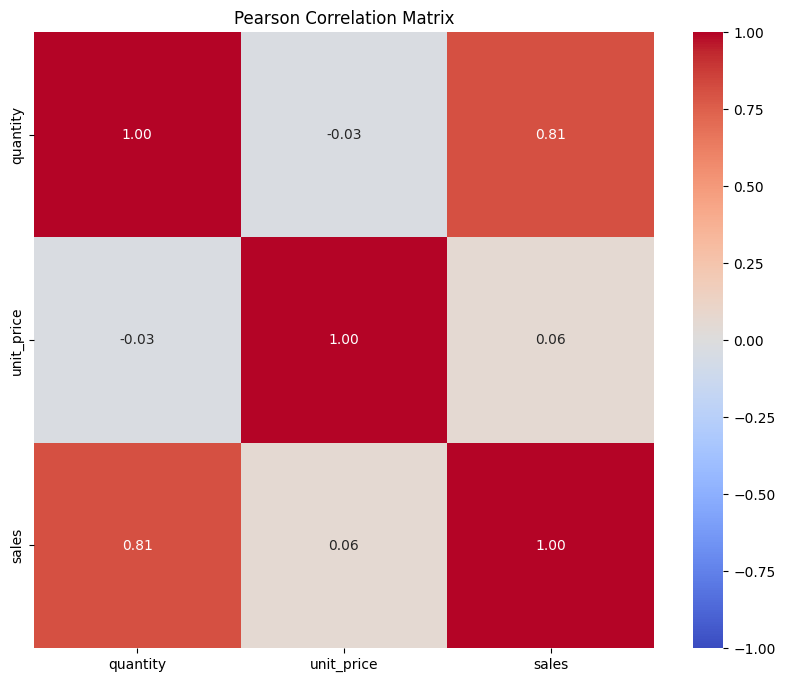

In [174]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_pearson, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Pearson Correlation Matrix')
plt.show()

**Strong Positive Correlation:** `quantity` and `sales` have a strong positive correlation, indicating that the number of units sold is closely related to the total sales.

# **Data Analysis**

### **General Sales Summary**

In [139]:
new_customers_per_year = []

# Iterate over the years to calculate new customers for each year
years = sorted(df['year'].unique())
for i, year in enumerate(years):
    # Customers who made a purchase in the current year
    current_year_customers = set(df[df['year'] == year]['customer_id'])
    
    # Customers who made a purchase in previous years
    previous_year_customers = set()
    if i > 0:
        for prev_year in years[:i]:
            previous_year_customers.update(df[df['year'] == prev_year]['customer_id'])
    
    # New customers for the current year
    new_customers = current_year_customers - previous_year_customers
    new_customers_per_year.append(len(new_customers))

# Group by year and calculate metrics
grouped = df.groupby('year').agg(
    unit_sold=('quantity', 'sum'),
    count_transaction=('order_id', 'count'),
    unique_customer=('customer_id', 'nunique'),
    total_sales=('sales', 'sum')
).reset_index()

# Add new customers to the grouped DataFrame
grouped['new_customers'] = new_customers_per_year

# Add a row for the overall total
total = pd.DataFrame({
    'year': ['TOTAL'],
    'unit_sold': [grouped['unit_sold'].sum()],
    'count_transaction': [grouped['count_transaction'].sum()],
    'unique_customer': [grouped['unique_customer'].sum()],
    'new_customers': [grouped['new_customers'].sum()],
    'total_sales': [grouped['total_sales'].sum()]
})

# Combine the grouped data with the overall total
yearly_summary = pd.concat([grouped, total], ignore_index=True)

# Display the result
yearly_summary

,year,unit_sold,count_transaction,unique_customer,total_sales,new_customers
0,2009,418485,44467,1041,778179.94,1041
1,2010,5180100,490379,4224,9135190.90,3304
2,2011,4811813,491869,4233,9012895.34,1532
3,TOTAL,10410398,1026715,9498,18926266.18,5877


**Key Insight:**

- **Comparison Between 2010 and 2011:** Since the data is complete for both years, we can observe a decline in `unit sold` and `total sales`, though it is not significant. This is `concerning for the business`, as sales figures for two consecutive years are nearly the same and even tend to be lower.
- **Unique Customer IDs:** There is a difference of 9 customers per year, indicating that our `acquisition performance is lacking`. Data shows that we only acquired 1,532 new customers throughout 2011, `averaging 5-6 new customers per day`, which is `relatively low for retail`.

**Recommendations:**

- **Strengthen New Customer Acquisition Strategy:** Implement strategies such as `special discount schemes for new customers who sign up for membership`, and offer additional discounts or promotions to those who register for membership.
- **Create a WhatsApp Channel:** Establish a WhatsApp channel where `members can claim exclusive promotions not available outside the channel`. It can also impactfull for Retention.

### **Cancellation Summary**

#### **Cancellation Summary**

In [140]:
cancel_filtered = cancel[cancel['transaction_status'] == 'Cancel']

cancel_summary = cancel_filtered.groupby('year').size().reset_index(name='total_cancellations')

total_cancellations = cancel_filtered.shape[0]

total_row = pd.DataFrame({
    'year': ['TOTAL'],
    'total_cancellations': [total_cancellations]
})

summary_cancel_2 = pd.concat([cancel_summary, total_row], ignore_index=True)
summary_cancel_2

,year,total_cancellations
0,2009,982
1,2010,8953
2,2011,7979
3,TOTAL,17914


The total number of cancellations is 17,914, with the highest being 8,953 in 2010

In [141]:
cancel_filtered = cancel[cancel['transaction_status'] == 'Cancel']
cancel_summary_monthly = cancel_filtered.groupby(['year', 'month']).size().reset_index(name='total_cancellations')
cancel_summary_monthly

,year,month,total_cancellations
0,2009,12,982
1,2010,1,620
2,2010,2,551
3,2010,3,768
4,2010,4,571
5,2010,5,953
6,2010,6,726
7,2010,7,694
8,2010,8,536
9,2010,9,749


In [142]:
retail_sales_filtered = retail_sales[retail_sales['transaction_status'] == 'Success']
retail_sales_summary_monthly = retail_sales_filtered.groupby(['year', 'month']).size().reset_index(name='total_successes')
retail_sales_summary_monthly

,year,month,total_successes
0,2009,12,43407
1,2010,1,30262
2,2010,2,27891
3,2010,3,39715
4,2010,4,32744
5,2010,5,33396
6,2010,6,38340
7,2010,7,31991
8,2010,8,32109
9,2010,9,40488


In [143]:
combined_summary = pd.merge(retail_sales_summary_monthly, cancel_summary_monthly, on=['year', 'month'], how='outer')
combined_summary['percentage'] = (combined_summary['total_cancellations'] / (combined_summary['total_successes'] + combined_summary['total_cancellations'])) * 100
combined_summary

,year,month,total_successes,total_cancellations,percentage
0,2009,12,43407,982,2.212260
1,2010,1,30262,620,2.007642
2,2010,2,27891,551,1.937276
3,2010,3,39715,768,1.897093
4,2010,4,32744,571,1.713943
5,2010,5,33396,953,2.774462
6,2010,6,38340,726,1.858393
7,2010,7,31991,694,2.123298
8,2010,8,32109,536,1.641905
9,2010,9,40488,749,1.816330


In [144]:
combined_summary['percentage'].mean()

1.7858622368404928

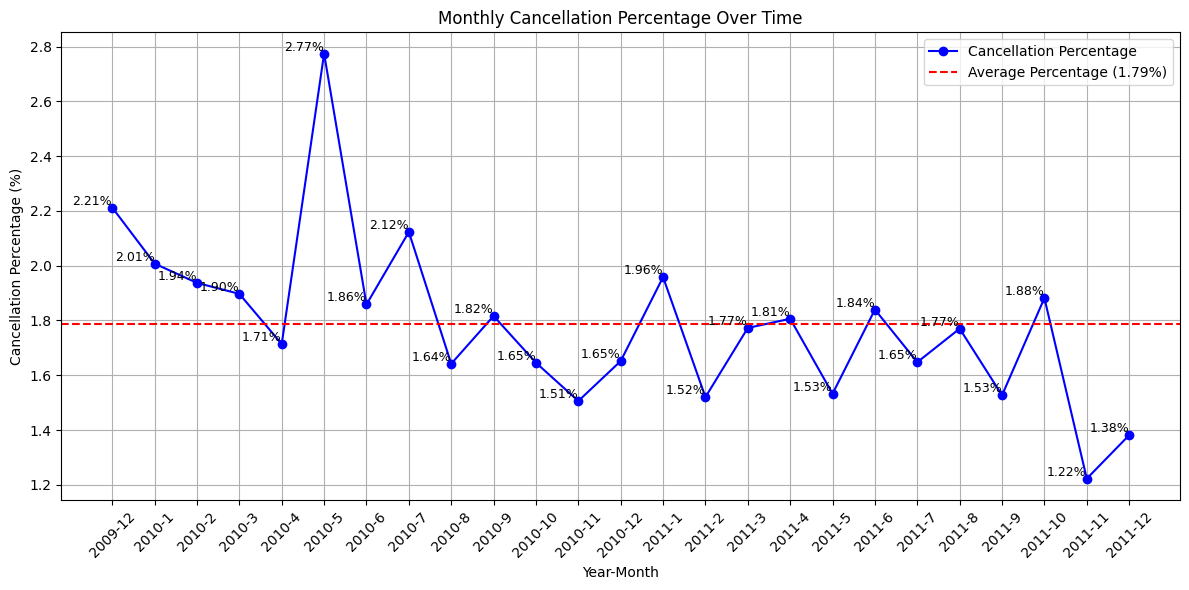

In [145]:
import matplotlib.pyplot as plt

# Mengasumsikan combined_summary adalah DataFrame yang sudah ada

# Plotting
plt.figure(figsize=(12, 6))

# Menggabungkan kolom 'year' dan 'month' menjadi string format "year-month"
combined_summary['year_month'] = combined_summary[['year', 'month']].astype(str).agg('-'.join, axis=1)

# Plotting the percentage trend
plt.plot(combined_summary['year_month'], combined_summary['percentage'], marker='o', linestyle='-', color='b', label='Cancellation Percentage')

# Menambahkan label di setiap titik
for i, row in combined_summary.iterrows():
    plt.text(row['year_month'], row['percentage'], f"{row['percentage']:.2f}%", fontsize=9, ha='right', va='bottom')

# Menghitung rata-rata persentase
average_percentage = combined_summary['percentage'].mean()

# Menambahkan garis rata-rata
plt.axhline(y=average_percentage, color='r', linestyle='--', label=f'Average Percentage ({average_percentage:.2f}%)')

# Menambahkan judul dan label sumbu
plt.title('Monthly Cancellation Percentage Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Cancellation Percentage (%)')

# Menambahkan grid
plt.grid(True)

# Memutar label sumbu x untuk visibilitas yang lebih baik
plt.xticks(rotation=45)

# Menampilkan legenda
plt.legend()

# Menyesuaikan tata letak
plt.tight_layout()

# Menampilkan plot
plt.show()


The highest cancellation percentage relative to successful transactions occurred in `May 2010`. Since `October 2010`, the cancellation percentage `has improved month-over-month`, as observed from the plot. Although there are still instances where the `percentage exceeds the average line`, the values are `not significantly higher`. This trend indicates that `the actions taken by the sales team to reduce the monthly cancellation rate have been quite effective`.


#### **Most Cancelled Product**

In [146]:
product_cancel_summary = cancel_filtered.groupby('product_id').size().reset_index(name='cancel_count')
product_descriptions = cancel[['product_id', 'product_description']].drop_duplicates()
product_cancel_summary = pd.merge(product_cancel_summary, product_descriptions, on='product_id', how='left')
product_cancel_summary = product_cancel_summary.sort_values(by='cancel_count', ascending=False)
product_cancel_summary.head(3)

,product_id,cancel_count,product_description
1310,22423,341,REGENCY CAKESTAND 3 TIER
1032,22138,209,BAKING SET 9 PIECE RETROSPOT
395,21232,187,STRAWBERRY CERAMIC TRINKET POT


**Key Insight**

The three products with the highest cancellation rates are:
- **REGENCY CAKESTAND 3 TIER (ID: 22423)**
- **BAKING SET 9 PIECE RETROSPOT (ID: 22138)**
- **STRAWBERRY CERAMIC TRINKET POT (ID: 21232)**

**Recommendation**

Evaluate these products by conducting the following actions:
- **Physical Inspection:** Check the products physically to ensure they meet quality standards and specifications.
- **Customer Feedback:** Gather feedback from customers regarding the product’s physical condition, pricing, and completeness. Consider requesting reviews on marketplace platforms and offer incentives to encourage feedback.
- **Complaint Form:** Create a complaint form for other products that are not canceled but are less favored by customers. This will help gather insights into potential issues and areas for improvement.

### **Sales Trend Analysis**

C:\Users\User\AppData\Local\Temp\ipykernel_21980\2984720432.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  retail_sales['order_date'] = pd.to_datetime(retail_sales['order_date'])
C:\Users\User\AppData\Local\Temp\ipykernel_21980\2984720432.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  retail_sales['year_month'] = retail_sales['order_date'].dt.to_period('M')


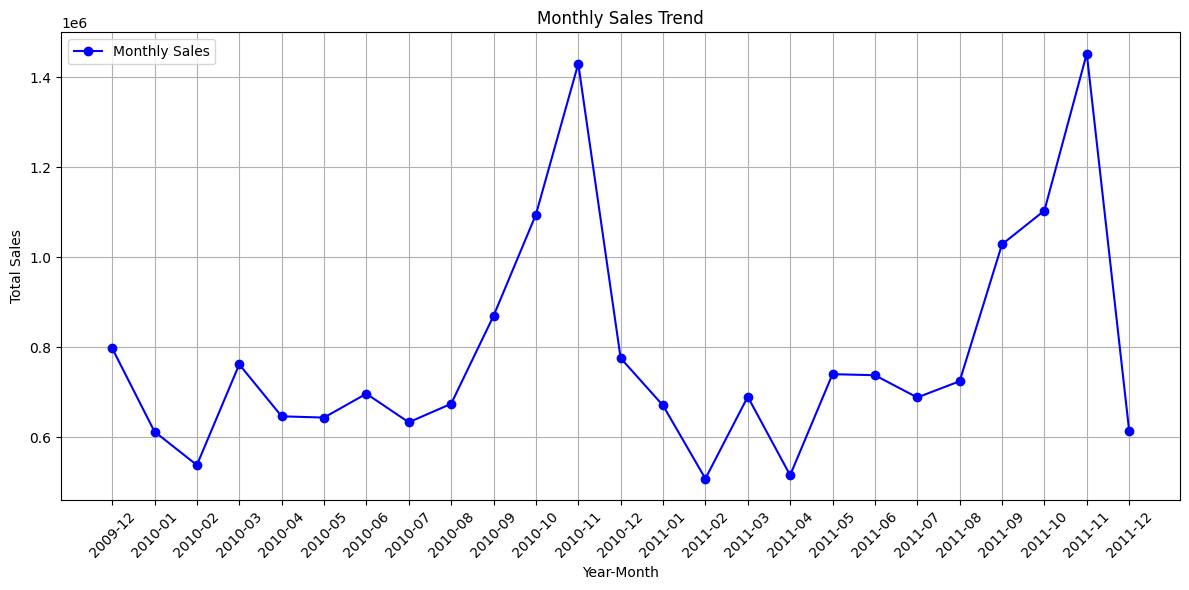

In [147]:
retail_sales['order_date'] = pd.to_datetime(retail_sales['order_date'])
retail_sales['year_month'] = retail_sales['order_date'].dt.to_period('M')
monthly_sales_summary = retail_sales.groupby('year_month')['sales'].sum().reset_index()


plt.figure(figsize=(12, 6))
plt.plot(monthly_sales_summary['year_month'].astype(str), monthly_sales_summary['sales'], marker='o', linestyle='-', color='b', label='Monthly Sales')
plt.title('Monthly Sales Trend')
plt.xlabel('Year-Month')
plt.ylabel('Total Sales')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

**Key Insight:**
- The monthly sales trend `shows a seasonal pattern` where `sales start to increase from August to November`. This is followed by a sharp `decline from December to February`.
- This trend might be related to the Christmas season in December. Customers likely purchase gifts one month before Christmas to avoid stock shortages.

**Recommendations:**
- Utilize the period one month before August, i.e., July, to `stock up on supplies`. This will `help we keep up with the increasing sales trend` through to the end of November.
- Take advantage of this period to `offer special promotions for products with lower demand`. Additionally, `consider bundling these less popular products with items experiencing higher demand` to leverage the sales surge.
- Use the `sales increase period to launch new products`. Even `if the new products don't perform well`, `we can benefit from the overall high sales` trend during this time.

C:\Users\User\AppData\Local\Temp\ipykernel_21980\4127419624.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  retail_sales['day'] = retail_sales['order_date'].dt.day


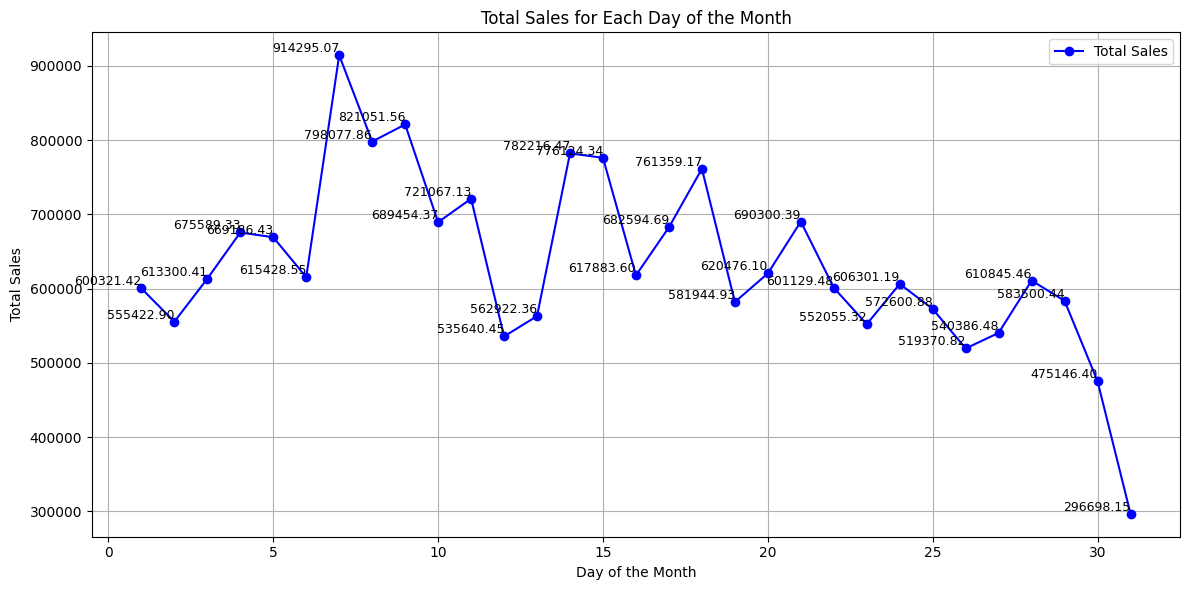

In [148]:
retail_sales['day'] = retail_sales['order_date'].dt.day
day_sales_summary = retail_sales.groupby('day')['sales'].sum().reset_index()
day_sales_summary.columns = ['day', 'total_sales']

plt.figure(figsize=(12, 6))
plt.plot(day_sales_summary['day'], day_sales_summary['total_sales'], marker='o', linestyle='-', color='b', label='Total Sales')
for i, row in day_sales_summary.iterrows():
    plt.text(row['day'], row['total_sales'], f"{row['total_sales']:.2f}", fontsize=9, ha='right', va='bottom')
plt.title('Total Sales for Each Day of the Month')
plt.xlabel('Day of the Month')
plt.ylabel('Total Sales')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

- It can be observed that the highest sales occur on the 7th, 8th, and 9th of each month, and starting from the 29th, sales gradually drop until the 31st.

This trend can be anticipated by offering an `end-of-month promotion`

C:\Users\User\AppData\Local\Temp\ipykernel_21980\1570389886.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  retail_sales['hour'] = retail_sales['order_date'].dt.hour


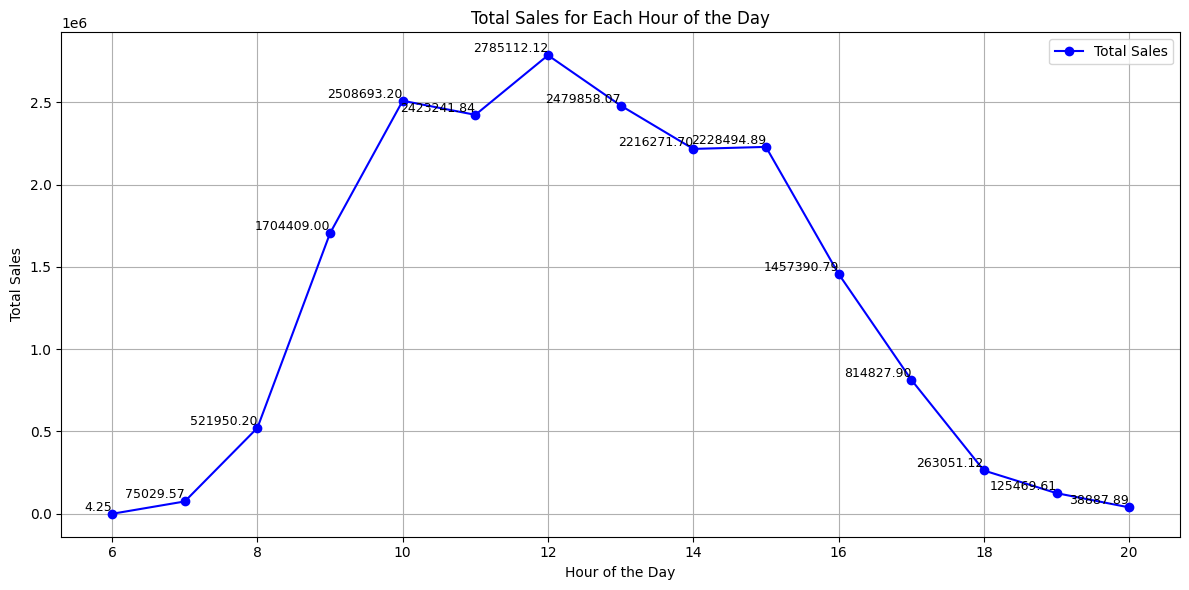

In [167]:

# Assuming 'retail_sales' is your DataFrame and 'sales' is the column to sum

# Extract the hour from the 'order_date' column
retail_sales['hour'] = retail_sales['order_date'].dt.hour

# Group by the 'hour' column and sum the sales
hour_sales_summary = retail_sales.groupby('hour')['sales'].sum().reset_index()
hour_sales_summary.columns = ['hour', 'total_sales']

# Plotting
plt.figure(figsize=(12, 6))

# Plotting the total sales for each hour of the day
plt.plot(hour_sales_summary['hour'], hour_sales_summary['total_sales'], marker='o', linestyle='-', color='b', label='Total Sales')

# Adding labels to each data point
for i, row in hour_sales_summary.iterrows():
    plt.text(row['hour'], row['total_sales'], f"{row['total_sales']:.2f}", fontsize=9, ha='right', va='bottom')

# Adding title and labels
plt.title('Total Sales for Each Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Sales')

# Adding grid
plt.grid(True)

# Displaying legend
plt.legend()

# Adjusting layout for better fit
plt.tight_layout()

# Displaying the plot
plt.show()


**Key Insight:**

- Our operational hours are from 06:00 to 20:00.
- The busiest hours, generating the highest sales, are between 10:00 and 15:00.

**Recommendations:**

- Increase the number of staff (cashiers and floor staff) during peak hours to avoid long queues and enhance customer satisfaction.
- For the online store, ensure admins are available to handle lunchtime peaks by rotating shifts, particularly around 12:00.
- Schedule promotions for less popular products during these peak hours to leverage high traffic and boost sales.



### **Product Analysis**

In [150]:

product_quantity_summary = retail_sales.groupby('product_description')['quantity'].sum().reset_index()
product_quantity_summary.columns = ['product_description', 'total_quantity']

product_sales_summary = retail_sales.groupby('product_description')['sales'].sum().reset_index()
product_sales_summary.columns = ['product_description', 'total_sales']

product_summary = pd.merge(product_quantity_summary, product_sales_summary, on='product_description')
product_summary_qty = product_summary.sort_values(by='total_quantity', ascending=False)

product_summary_qty.head()

,product_description,total_quantity,total_sales
5269,WORLD WAR 2 GLIDERS ASSTD DESIGNS,106250,24445.61
5147,WHITE HANGING HEART T-LIGHT HOLDER,94663,260990.22
3172,"PAPER CRAFT , LITTLE BIRDIE",80995,168469.60
305,ASSORTED COLOUR BIRD ORNAMENT,80090,129324.49
2737,MEDIUM CERAMIC TOP STORAGE JAR,78033,81700.92


In [151]:
product_quantity_summary = retail_sales.groupby('product_description')['quantity'].sum().reset_index()
product_quantity_summary.columns = ['product_description', 'total_quantity']

product_sales_summary = retail_sales.groupby('product_description')['sales'].sum().reset_index()
product_sales_summary.columns = ['product_description', 'total_sales']

product_summary = pd.merge(product_quantity_summary, product_sales_summary, on='product_description')

product_summary = product_summary.sort_values(by='total_sales', ascending=False)

product_summary.head()

,product_description,total_quantity,total_sales
3814,REGENCY CAKESTAND 3 TIER,26495,330590.32
5147,WHITE HANGING HEART T-LIGHT HOLDER,94663,260990.22
3172,"PAPER CRAFT , LITTLE BIRDIE",80995,168469.60
3198,PARTY BUNTING,28248,148318.28
2429,JUMBO BAG RED RETROSPOT,77705,148073.47


**Key Insights:**

- **REGENCY CAKESTAND 3 TIER** is a prestige product. Despite a relatively low sales volume of 26,495 units, it has generated the highest revenue at £330,590.32. To achieve a significant increase in revenue, we should focus on boosting the quantity sold of this product.

- Similarly, **PARTY BUNTING** has a moderate sales volume of 28,248 units but has contributed a substantial revenue of £148,318. Efforts should be made to increase the sales volume of this product to enhance revenue further.

- **WORLD WAR 2 GLIDERS ASSTD DESIGNS** is a favorite product, being the top seller in terms of units sold. We can leverage this by pairing it with non-favorite products for bundling, which will help increase sales of the less popular items and drive overall revenue growth.

### **Customer Segmentation**

We will segment customers using RFM analysis.

`RFM Analysis` is a method used for customer segmentation and to evaluate and analyze customer value based on three key metrics:

- Recency (R): This measures how recently a customer has made a purchase. Customers who have purchased more recently are typically considered more valuable, as they are more likely to respond to marketing efforts and make repeat purchases.

- Frequency (F): This measures how often a customer makes a purchase. Customers who make purchases more frequently are generally more loyal and engaged with the brand. High frequency often indicates higher customer satisfaction and engagement.

- Monetary (M): This measures how much money a customer spends. Customers who spend more are usually considered more valuable because they contribute more to the company's revenue.

First, we will remove customer IDs that are 'Unidentified' by filtering and defining a new DataFrame called `rfm`.

In [152]:
rfm = retail_sales[retail_sales['customer_id'] != 'Unidentified']

Next, we will group the data by `CustomerID` and calculate the recency based on the number of days since their last purchase.

In [153]:
df_recency = rfm.groupby(by='customer_id', 
                        as_index=False)['order_date'].max()
df_recency.columns = ['CustomerID', 'LastPurchaseDate']
recent_date = df_recency['LastPurchaseDate'].max()
df_recency['Recency'] = df_recency['LastPurchaseDate'].apply(
    lambda x: (recent_date - x).days)
df_recency.head()

,CustomerID,LastPurchaseDate,Recency
0,12346.0,2011-01-18 10:01:00,325
1,12347.0,2011-12-07 15:52:00,1
2,12348.0,2011-09-25 13:13:00,74
3,12349.0,2011-11-21 09:51:00,18
4,12350.0,2011-02-02 16:01:00,309


For frequency, we will determine how often each `CustomerID` makes a purchase.

In [154]:
frequency_df = rfm.drop_duplicates().groupby(
    by=['customer_id'], as_index=False)['order_date'].count()
frequency_df.columns = ['CustomerID', 'Frequency']
frequency_df.head()

,CustomerID,Frequency
0,12346.0,25
1,12347.0,222
2,12348.0,46
3,12349.0,172
4,12350.0,16


Finally, for monetary, we will calculate the total amount of money that each `CustomerID` has spent.

In [155]:
rfm['Total'] = rfm['sales']
monetary_df = rfm.groupby(by='customer_id', as_index=False)['Total'].sum()
monetary_df.columns = ['CustomerID', 'Monetary']
monetary_df.head()

C:\Users\User\AppData\Local\Temp\ipykernel_21980\819394239.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm['Total'] = rfm['sales']


,CustomerID,Monetary
0,12346.0,77352.96
1,12347.0,4921.53
2,12348.0,1658.40
3,12349.0,3678.69
4,12350.0,294.40


Merge all columns based on `CustomerID`.

In [156]:
rf_df = df_recency.merge(frequency_df, on='CustomerID')
rfm_df = rf_df.merge(monetary_df, on='CustomerID').drop(
    columns='LastPurchaseDate')
rfm_df.head()

,CustomerID,Recency,Frequency,Monetary
0,12346.0,325,25,77352.96
1,12347.0,1,222,4921.53
2,12348.0,74,46,1658.40
3,12349.0,18,172,3678.69
4,12350.0,309,16,294.40


Ranking Customer’s based upon their recency, frequency, and monetary score. Here we are normalizing the rank of the customers within a company to analyze the ranking.

In [157]:
rfm_df['R_rank'] = rfm_df['Recency'].rank(ascending=False)
rfm_df['F_rank'] = rfm_df['Frequency'].rank(ascending=True)
rfm_df['M_rank'] = rfm_df['Monetary'].rank(ascending=True)
 
# normalizing the rank of the customers
rfm_df['R_rank_norm'] = (rfm_df['R_rank']/rfm_df['R_rank'].max())*100
rfm_df['F_rank_norm'] = (rfm_df['F_rank']/rfm_df['F_rank'].max())*100
rfm_df['M_rank_norm'] = (rfm_df['F_rank']/rfm_df['M_rank'].max())*100
 
rfm_df.drop(columns=['R_rank', 'F_rank', 'M_rank'], inplace=True)
 
rfm_df.head()

,CustomerID,Recency,Frequency,Monetary,R_rank_norm,F_rank_norm,M_rank_norm
0,12346.0,325,25,77352.96,28.930601,29.642918,29.642918
1,12347.0,1,222,4921.53,98.458757,84.606185,84.606185
2,12348.0,74,46,1658.40,54.572068,46.420639,46.420639
3,12349.0,18,172,3678.69,80.885139,79.873569,79.873569
4,12350.0,309,16,294.40,30.144653,19.519904,19.519904


Calculating RFM score

RFM score is calculated based upon recency, frequency, monetary value normalize ranks. Based upon this score we divide our customers. Here we rate them on a scale of 5. Formula used for calculating rfm score is : 0.15*Recency score + 0.28*Frequency score + 0.57 *Monetary score

In [158]:
rfm_df['RFM_Score'] = 0.15*rfm_df['R_rank_norm']+0.28 * \
    rfm_df['F_rank_norm']+0.57*rfm_df['M_rank_norm']
rfm_df['RFM_Score'] *= 0.05
rfm_df = rfm_df.round(2)
rfm_df[['CustomerID', 'RFM_Score']].head(7)

,CustomerID,RFM_Score
0,12346.0,1.48
1,12347.0,4.33
2,12348.0,2.38
3,12349.0,4.00
4,12350.0,1.06
5,12351.0,1.28
6,12352.0,3.35


Rating Customer based upon the RFM score
- rfm score >4.5 : Top Customer
- 4.5 > rfm score > 4 : High Value Customer
- 4>rfm score >3 : Medium value customer
- 3>rfm score>1.6 : Low-value customer
- rfm score<1.6 :Lost Customer

Here is the classification of `CustomerID` based on the Segment as viewed from the RFMSCore.

In [159]:
rfm_df["Customer_segment"] = np.where(rfm_df['RFM_Score'] >
                                      4.5, "Top Customers", 
                                      (np.where(
                                        rfm_df['RFM_Score'] > 4,
                                        "High value Customer",
                                        (np.where(
    rfm_df['RFM_Score'] > 3,
                             "Medium Value Customer",
                             np.where(rfm_df['RFM_Score'] > 1.6, 
                            'Low Value Customers', 'Lost Customers'))))))
rfm_df[['CustomerID', 'RFM_Score', 'Customer_segment']].head(20)

,CustomerID,RFM_Score,Customer_segment
0,12346.0,1.48,Lost Customers
1,12347.0,4.33,High value Customer
2,12348.0,2.38,Low Value Customers
3,12349.0,4.00,Medium Value Customer
4,12350.0,1.06,Lost Customers
5,12351.0,1.28,Lost Customers
6,12352.0,3.35,Medium Value Customer
7,12353.0,1.51,Lost Customers
8,12354.0,2.53,Low Value Customers
9,12355.0,1.93,Low Value Customers


Here is the visualization of the proportion for each segment.

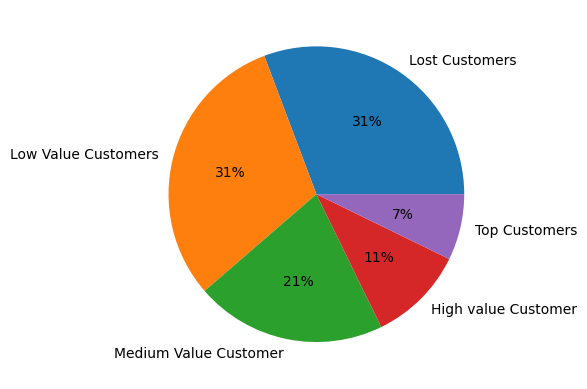

In [160]:
plt.pie(rfm_df.Customer_segment.value_counts(),
        labels=rfm_df.Customer_segment.value_counts().index,
        autopct='%.0f%%')
plt.show()

In [161]:
total_customers = rfm_df['CustomerID'].nunique()
total_customers

5853

In [162]:
segment_counts = rfm_df.groupby('Customer_segment').size().reset_index(name='count')
segment_counts.sort_values(by='count', ascending=False)

,Customer_segment,count
1,Lost Customers,1799
2,Low Value Customers,1792
3,Medium Value Customer,1222
0,High value Customer,617
4,Top Customers,423


**Key Insight**

- Lost Customers and Low Value Customers are the most dominant segments.

**Recommendation**

- **Evaluate Pricing**: Conduct market research to compare pricing and product quality with similar items to ensure competitiveness.
- **Competitor Analysis**: Study competitors' strategies for improving customer retention to adopt effective practices.
- **Re-engage Lost Customers**:
  - **Targeted Campaigns**: Develop campaigns or special promotions to attract these customers back, using personalized offers based on their previous interests.
  - **Feedback Collection**: Gather feedback to understand why they stopped purchasing and address any issues or concerns they might have.

- **Increase Engagement with Low Value Customers**:
  - **Loyalty Programs**: Implement or enhance loyalty programs to encourage more frequent purchases and higher spending.
  - **Targeted Promotions**: Offer targeted promotions or discounts to increase their purchase frequency and overall spending.

- **Reward High Value Customers**:
  - **Exclusive Benefits**: Provide exclusive benefits, early access to new products, or special offers to maintain their loyalty and encourage further spending.
  - **Referral Programs**: Incentivize referrals by offering rewards for successful referrals to leverage their positive experience.

- **Leverage Top Customers**:
  - **Ambassador Programs**: Create ambassador or VIP programs to capitalize on their loyalty and enthusiasm, offering opportunities to test new products or provide feedback.
  - **Customer Feedback**: Engage top customers in giving feedback on new initiatives or products, as their insights can be valuable for future developments.

# **Insight and Recommendation**

**Insight**

1. **Sales Summary**The comparison between 2010 and 2011 reveals a concerning decline in both `unit sold` and `total sales`, with a slight drop in sales figures and only 1,532 new customers acquired in 2011, averaging just 5-6 new customers per day, highlighting a potential issue with acquisition performance.

2. **Cancelled Summary**
(a) The total number of cancellations is 17,914, with the highest being 8,953 in 2010; however, the cancellation percentage relative to successful transactions peaked in May 2010 but has improved month-over-month since October 2010, indicating that the sales team's efforts to reduce cancellations have been quite effective. (b)The three products with the highest cancellation rates are the Regency Cake Stand 3 Tier (ID: 22423), Baking Set 9 Piece Retropot (ID: 22138), and Strawberry Ceramic Trinket Pot (ID: 21232).

3. **Sales Trend**
(a) The monthly sales trend reveals a seasonal pattern with sales increasing from August to November and sharply declining from December to February, likely due to customers buying gifts before Christmas to avoid stock shortages.
(b) The highest sales occur on the 7th, 8th, and 9th of each month, with a gradual decline starting from the 29th to the 31st, which can be addressed by implementing an end-of-month promotion.
(c) Our operational hours are from 06:00 to 20:00, with the peak sales occurring between 10:00 and 15:00.

4. **Product Performance**
**REGENCY CAKESTAND 3 TIER** has generated the highest revenue despite low sales volume, **PARTY BUNTING** has substantial revenue with moderate sales volume, and **WORLD WAR 2 GLIDERS ASSTD DESIGNS** is a top seller in units, highlighting potential areas for revenue growth.

5. **Lost Customers** and **Low Value Customers** are the most prevalent segments, indicating a significant portion of the customer base falls into these categories.




**Recommendation**

1. Strengthen new customer acquisition by implementing special discount schemes for new members and create a WhatsApp channel offering exclusive promotions to enhance retention and engagement.

2. Evaluate these products by conducting a physical inspection, gathering customer feedback on quality and pricing, offering incentives for marketplace reviews, and creating a complaint form for other less favored products to identify areas for improvement.

3. (a) Leverage July to stock up on supplies to keep up with the sales surge through November, offer special promotions and bundle less popular products with high-demand items, and launch new products to benefit from the overall high sales trend.
(c)  Increase staff during peak hours to minimize queues and enhance satisfaction, ensure online admins are available during lunchtime peaks, and schedule promotions for less popular products to leverage high traffic and boost sales.

4. Focus on boosting the sales quantity of **REGENCY CAKESTAND 3 TIER** and **PARTY BUNTING** to increase revenue, and leverage the popularity of **WORLD WAR 2 GLIDERS ASSTD DESIGNS** by bundling it with less popular products to drive overall sales.

5. **Evaluate pricing** and **competitor strategies**, **re-engage lost customers** with targeted campaigns and feedback collection, **increase engagement** with low-value customers through loyalty programs and promotions, **reward high-value customers** with exclusive benefits and referral incentives, and **leverage top customers** by creating ambassador programs and gathering their feedback on new initiatives.
